In [1]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('..')
import gym
import envs

# UAV Platooning

In [3]:
import envs.tarski.uav_platoon

In [4]:
env = gym.make('UAV-Platooning-0000-v1')

## Passive Dynamics ($U$ = 0)

In [5]:
frames = []
x0 = env.reset()
S_zero = [x0]
g_zero = []
while True:
    u = np.zeros(env.action_space.shape[0])
    frames += [ env.render(mode="rgb_array") ]
    x, r, done, info = env.step(u)
    S_zero.append(x)
    g_zero.append(r)
    if done: break
S_zero = np.hstack(S_zero)
g_zero = np.asarray(g_zero, dtype=np.float64)
J_zero = np.asarray([ np.sum(g_zero[k:]) for k in range(g_zero.shape[0])], dtype=np.float64)

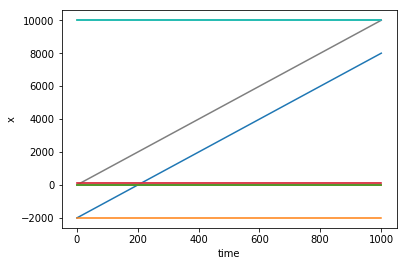

In [6]:
plt.xlabel('time')
plt.ylabel('x')
for x_dim in range(S_zero.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_zero.shape[1], num=S_zero.shape[1])
    ys = S_zero[x_dim,:]
    plt.plot(xs, ys)

## MPC

In [7]:
#env.unwrapped.solver.x0 = x.tolist()
#env.unwrapped.solver.start()
#env.unwrapped.solver.solve()
#X, U, J, iteration = env.unwrapped.solver.trajectory
#k, K = env.unwrapped.solver.control_law

In [8]:
x0 = env.reset()
S_mpc = [x0]
U_mpc = []
g_mpc = []
J_mpc = 0.0
x = x0
total_time = 0.0
while True:
    env.unwrapped.solver.x0 = x.tolist()
    env.unwrapped.solver.start()
    env.unwrapped.solver.solve()
    X, U, J, iteration = env.unwrapped.solver.trajectory
    total_time += env.unwrapped.solver.elapsed_time
    u = np.array(U[0]).reshape(env.action_space.shape)
    U_mpc.append(u)
    x, r, done, info = env.step(u)
    S_mpc.append(x)
    g_mpc.append(r)
    J_mpc += r
    if done: break

[[0.        ]
 [0.523599  ]
 [2.06232253]]
[[0.        ]
 [0.523599  ]
 [2.06759518]]
[[0.        ]
 [0.523599  ]
 [2.07500252]]
[[0.        ]
 [0.523599  ]
 [2.08441931]]
[[0.       ]
 [0.523599 ]
 [2.0957088]]
[[0.        ]
 [0.523599  ]
 [2.10872877]]
[[0.        ]
 [0.523599  ]
 [2.12332733]]
[[0.        ]
 [0.523599  ]
 [2.13934356]]
[[0.        ]
 [0.523599  ]
 [2.15661559]]
[[0.        ]
 [0.523599  ]
 [2.17496746]]
[[0.        ]
 [0.523599  ]
 [2.19425366]]
[[0.        ]
 [0.523599  ]
 [2.21433501]]
[[0.        ]
 [0.523599  ]
 [2.23507281]]
[[0.        ]
 [0.523599  ]
 [2.25627784]]
[[0.        ]
 [0.523599  ]
 [2.27810984]]
[[0.        ]
 [0.523599  ]
 [2.30047901]]
[[0.        ]
 [0.523599  ]
 [2.32316063]]
[[0.        ]
 [0.523599  ]
 [2.34535197]]
[[0.        ]
 [0.523599  ]
 [2.36570359]]
[[0.        ]
 [0.523599  ]
 [2.38470389]]
[[0.        ]
 [0.523599  ]
 [2.42299625]]
[[0.        ]
 [0.523599  ]
 [2.44475343]]
[[0.       ]
 [0.523599 ]
 [2.4543939]]
[[0.        ]
 [0

 [2.54325283]]
[[0.        ]
 [0.00374918]
 [2.54316966]]
[[0.        ]
 [0.00363576]
 [2.54308655]]
[[0.        ]
 [0.00352623]
 [2.54300352]]
[[0.        ]
 [0.00342043]
 [2.54292053]]
[[0.       ]
 [0.0033182]
 [2.5428376]]
[[0.        ]
 [0.00321938]
 [2.54275472]]
[[0.        ]
 [0.00312383]
 [2.54267186]]
[[0.        ]
 [0.00303142]
 [2.54258904]]
[[0.        ]
 [0.00294202]
 [2.54250623]]
[[0.        ]
 [0.00285551]
 [2.54242342]]
[[0.        ]
 [0.00277176]
 [2.54234062]]
[[0.        ]
 [0.00269069]
 [2.5422578 ]]
[[0.        ]
 [0.00261217]
 [2.54217495]]
[[0.00000000e+00]
 [2.53612539e-03]
 [2.54209206e+00]]
[[0.00000000e+00]
 [2.46244766e-03]
 [2.54200913e+00]]
[[0.00000000e+00]
 [2.39105256e-03]
 [2.54192613e+00]]
[[0.00000000e+00]
 [2.32185549e-03]
 [2.54184306e+00]]
[[0.00000000e+00]
 [2.25477577e-03]
 [2.54175990e+00]]
[[0.00000000e+00]
 [2.18973630e-03]
 [2.54167664e+00]]
[[0.00000000e+00]
 [2.12666345e-03]
 [2.54159326e+00]]
[[0.00000000e+00]
 [2.06548676e-03]
 [2.5415

 [2.28687439]]
[[0.        ]
 [0.0415572 ]
 [2.26556546]]
[[0.        ]
 [0.01626612]
 [2.24091881]]
[[0.        ]
 [0.0240766 ]
 [2.21306831]]
[[0.        ]
 [0.04785449]
 [2.18229101]]
[[0.        ]
 [0.05754041]
 [2.14665965]]
[[0.        ]
 [0.04363325]
 [2.10614265]]
[[0.        ]
 [0.        ]
 [2.05841995]]
[[0.        ]
 [0.05659992]
 [2.00663965]]
[[0.        ]
 [0.04363325]
 [1.9461135 ]]
[[0.        ]
 [0.04445559]
 [1.87653081]]
[[0.        ]
 [0.        ]
 [1.79341895]]
[[0.        ]
 [0.04363325]
 [1.7043065 ]]
[[0.        ]
 [0.        ]
 [1.59609192]]
[[0.        ]
 [0.        ]
 [1.47663452]]
[[ 0.        ]
 [-0.09515125]
 [ 1.33564898]]
[[ 0.        ]
 [-0.174533  ]
 [ 1.18645741]]
[[ 0.        ]
 [-0.04247223]
 [ 1.02525156]]
[[ 0.        ]
 [-0.25166626]
 [ 0.84346833]]
[[ 0.        ]
 [-0.1712531 ]
 [ 0.65083422]]
[[ 0.        ]
 [-0.11697592]
 [ 0.45415101]]
[[ 0.        ]
 [-0.05576691]
 [ 0.2470945 ]]
[[0.        ]
 [0.03889751]
 [0.03669242]]
[[ 0.        ]
 [ 

 [-3.58436659]]
[[ 0.       ]
 [ 0.523599 ]
 [-3.5871581]]
[[ 0.        ]
 [ 0.4363325 ]
 [-3.58904201]]
[[ 0.        ]
 [ 0.4363325 ]
 [-3.59253965]]
[[ 0.        ]
 [ 0.4363325 ]
 [-3.59602088]]
[[ 0.        ]
 [ 0.4363325 ]
 [-3.59921729]]
[[ 0.        ]
 [ 0.39269925]
 [-3.60083608]]
[[ 0.        ]
 [ 0.39269925]
 [-3.6023025 ]]
[[ 0.        ]
 [ 0.4363325 ]
 [-3.60271388]]
[[ 0.        ]
 [ 0.349066  ]
 [-3.60157999]]
[[ 0.        ]
 [ 0.174533  ]
 [-3.60290516]]
[[ 0.        ]
 [ 0.174533  ]
 [-3.60417512]]
[[ 0.       ]
 [ 0.174533 ]
 [-3.6053315]]
[[ 0.        ]
 [ 0.174533  ]
 [-3.60637147]]
[[ 0.        ]
 [ 0.2617995 ]
 [-3.61039298]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60561054]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60615271]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60662912]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60704041]]
[[ 0.       ]
 [ 0.0872665]
 [-3.6073872]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60767005]]
[[ 0.        ]
 [ 0.0872665 ]
 [-3.60788943]]
[[ 0.        ]
 [ 0.0872665

[[ 0.        ]
 [ 0.0872665 ]
 [-2.59498799]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.58001086]]
[[ 0.       ]
 [ 0.0872665]
 [-2.5644939]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.54840389]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.53176574]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.51451617]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.49670993]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.47825572]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.45923623]]
[[ 0.       ]
 [-0.0872665]
 [-2.4395342]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.41925828]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.39826734]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.37669407]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.35437546]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.33146646]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.30778404]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.28350374]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.25842426]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.23274021]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.20623357]]
[[ 0.        ]
 [ 0.0872665 ]
 [-2.17911672]]
[[ 0.        ]
 [-0.0872665 ]
 [-2.15115

[[0.        ]
 [0.174533  ]
 [2.72646063]]
[[0.        ]
 [0.2617995 ]
 [2.72901559]]
[[0.        ]
 [0.0872665 ]
 [2.72962033]]
[[0.       ]
 [0.0872665]
 [2.7240622]]
[[0.        ]
 [0.0872665 ]
 [2.71874445]]
[[0.        ]
 [0.0872665 ]
 [2.71366151]]
[[0.        ]
 [0.0872665 ]
 [2.70880744]]
[[0.        ]
 [0.0872665 ]
 [2.70417523]]
[[0.        ]
 [0.0872665 ]
 [2.69975979]]
[[0.        ]
 [0.0872665 ]
 [2.69555382]]
[[0.        ]
 [0.0872665 ]
 [2.69155041]]
[[0.        ]
 [0.04363325]
 [2.69233722]]
[[0.        ]
 [0.04363325]
 [2.68854938]]
[[0.        ]
 [0.04363325]
 [2.68491207]]
[[0.        ]
 [0.04363325]
 [2.68143056]]
[[0.        ]
 [0.04363325]
 [2.67809405]]
[[0.        ]
 [0.04363325]
 [2.6748968 ]]
[[0.        ]
 [0.04363325]
 [2.6718141 ]]
[[ 0.        ]
 [-0.01507621]
 [ 2.6711852 ]]
[[ 0.        ]
 [-0.03155012]
 [ 2.66755107]]
[[0.        ]
 [0.02181662]
 [2.66464196]]
[[0.        ]
 [0.02253782]
 [2.65694204]]
[[0.        ]
 [0.0872665 ]
 [2.64770188]]
[[0.    

In [9]:
print('MPC over sim: {} msecs'.format(total_time))

MPC over sim: 33279.0 msecs


In [10]:
S_mpc = np.hstack(S_mpc)
U_mpc = np.hstack(U_mpc)
g_mpc = np.asarray(g_mpc, dtype=np.float64)

### Trajectory on the $x$-$y$ plane

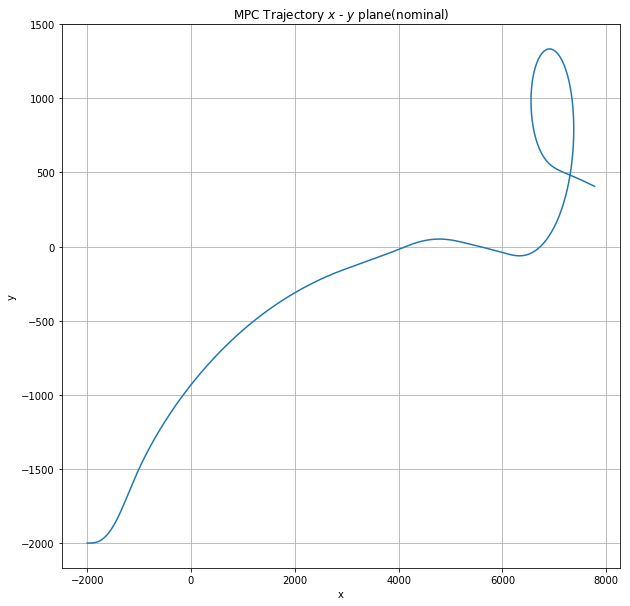

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
title = 'MPC Trajectory $x$ - $y$ plane(nominal)'
ax.grid(True)
ax.set_title(title)
ax.set_xlabel('x')
ax.set_ylabel('y')
# Plot a single line
xs = S_mpc[0,:]
ys = S_mpc[1,:]
ax.plot(xs, ys)

### State variables temporal evolution

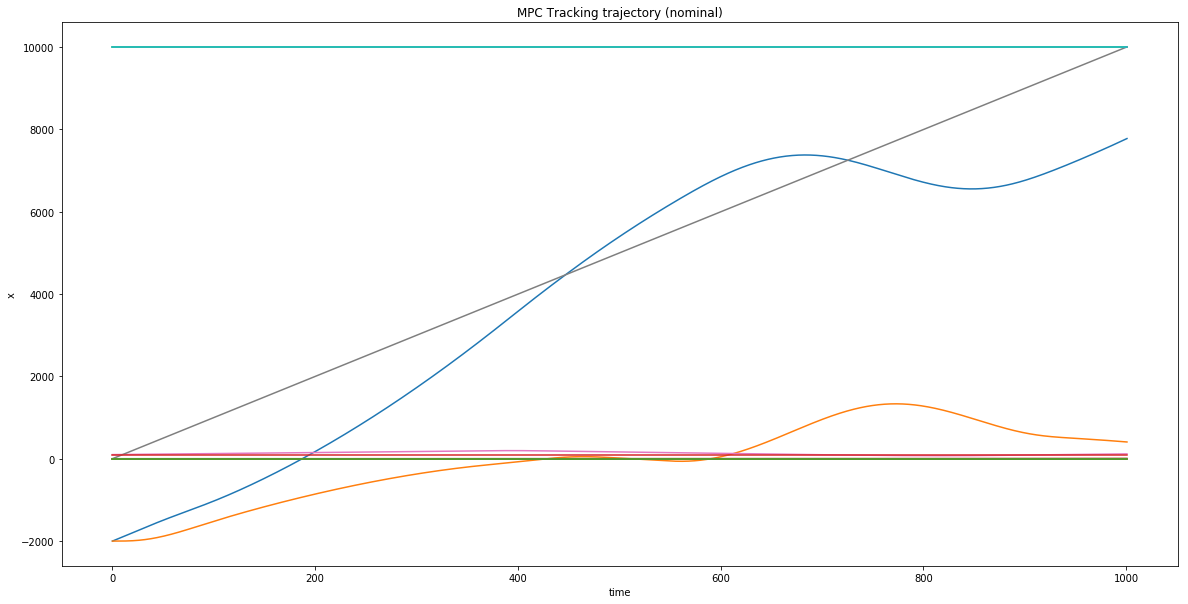

In [12]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
title = 'MPC Tracking trajectory (nominal)'
ax.set_title(title)
ax.set_xlabel('time')
ax.set_ylabel('x')
for x_dim in range(S_mpc.shape[0]):
    xs = np.linspace(0, S_mpc.shape[1], num=S_mpc.shape[1])
    ys = S_mpc[x_dim,:]
    ax.plot(xs, ys)

### Control input sequence

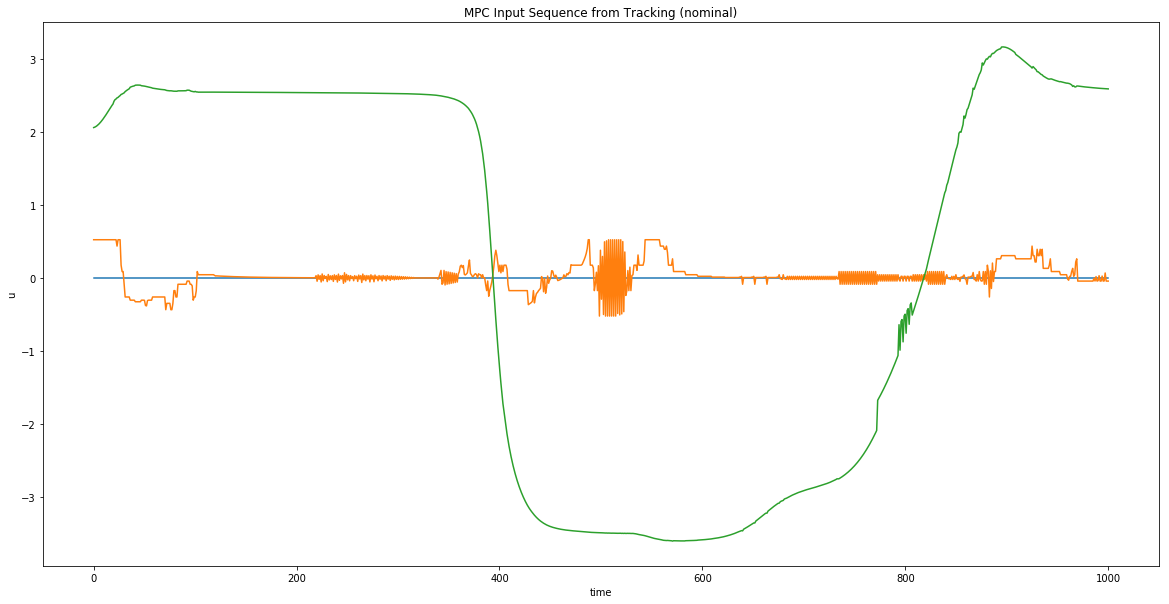

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
title = 'MPC Input Sequence from Tracking (nominal)'

ax.set_title(title)
ax.set_xlabel('time')
ax.set_ylabel('u')
for x_dim in range(U_mpc.shape[0]):
    # Plot a single line
    xs = np.linspace(0, U_mpc.shape[1], num=U_mpc.shape[1])
    ys = U_mpc[x_dim,:]
    ax.plot(xs, ys)

### MPC costs

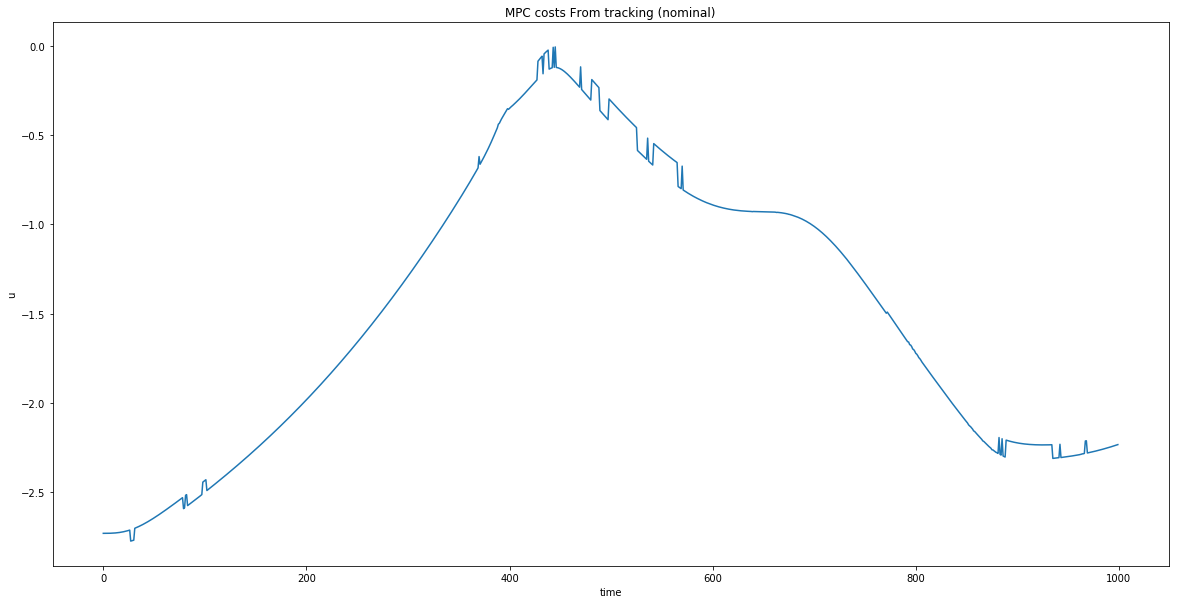

In [15]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
title = 'MPC costs From tracking (nominal)'

ax.set_title(title)
ax.set_xlabel('time')
ax.set_ylabel('u')
xs = np.arange(len(g_mpc))
ys = g_mpc
ax.plot(xs, ys)